## Training and Testing a Decision Tree Classifier model that trades SPY

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          # Import scikit-learn metrics module for accuracy calculation
%matplotlib widget

# Read data from CSV
df = pd.read_csv("SPY_train_test_data.csv")

In [2]:
# Set Date as index
datetime_index = pd.DatetimeIndex(pd.to_datetime(df['Date']))
df = df.set_index(datetime_index)
df = df.drop(['Date'], axis=1)

<AxesSubplot:xlabel='Date'>

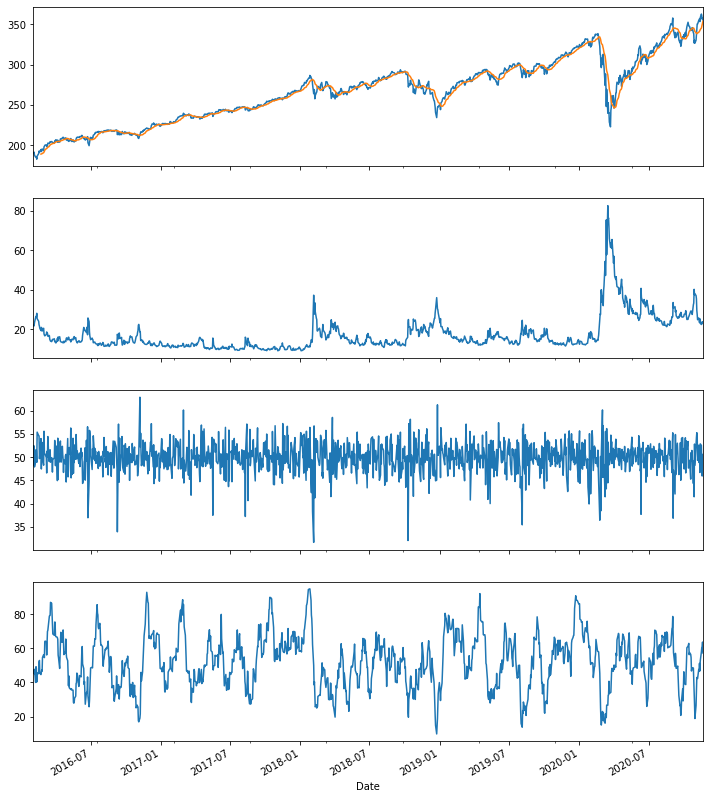

In [4]:
# Plot SPY data and some indicators
fig, axes = plt.subplots(4, figsize=(10,12), sharex=True)

df['SPY'].plot(ax=axes[0])
df['SPY'].rolling(window = 14).mean().plot(ax=axes[0])
df['VIX'].plot(ax=axes[1])
df['RSI_14'].plot(ax=axes[2])
df['MFI_14'].plot(ax=axes[3])

In [9]:
features = ['VIX', 'RSI_7', 'RSI_14', 'MFI_7', 'MFI_14', 'pct_chg_1', 'pct_chg_5', 'diffSPY', 'diffRSI']
x = df[features]

features2 = ['MFI_14', 'RSI_14', 'VIX', 'pct_chg_5', 'diffSPY']
x2 = df[features2]

y = df['signal']

X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.20, shuffle=False)# 80% training and 20% test

# Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=10)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

df['signal_pred'] = 0
df.iloc[-len(y_pred):]['signal_pred'] = y_pred

Accuracy: 0.7983539094650206


starting capital: 3000
current account value: 4110.03
gain: 37.0%
buys: 18
sells: 8


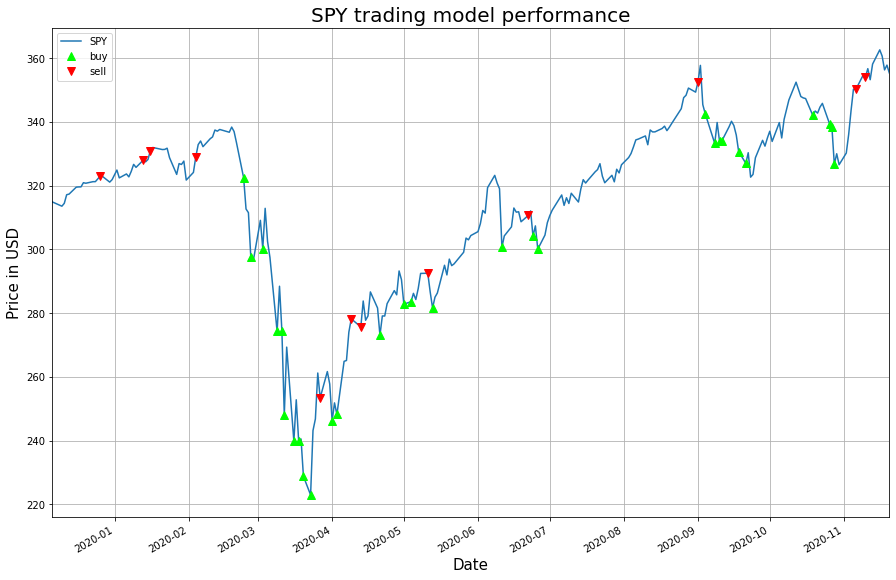

In [17]:
# Simple backtest simulating trades generated by the Classifier
capital = 3000
account = capital
buys = 0
sells = 0
shares = 0
for i in range(len(df)):
    if df['signal_pred'][i] == 1 and account > 0:
        account -= df.iloc[i]['SPY']
        buys += 1
        shares += 1
    elif df['signal_pred'][i] == -1 and shares > 0:
        account += df.iloc[i]['SPY']
        sells += 1
        shares -= 1
        
account += (buys - sells)*df.iloc[-1]['SPY']
print('starting capital:', capital)
print('current account value:', round(account, 2))
print('gain:', str(round(((account / capital)-1) * 100, 2)) + '%')
print('buys:', buys)
print('sells:', sells)


# Visualize the trades
plt.figure(figsize = (15,10))
# plot close price
df.iloc[-len(y_pred): , 0].plot(label= 'SPY')

# plot buy prices
plt.plot(df[df['signal_pred'] == 1].index, 
         df['SPY'][df['signal_pred'] == 1], 
         '^', markersize = 8, color = 'lime', label = 'buy')

# plot sell prices
plt.plot(df[df['signal_pred'] == -1].index, 
         df['SPY'][df['signal_pred'] == -1], 
         'v', markersize = 8, color = 'r', label = 'sell')

plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SPY trading model performance', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

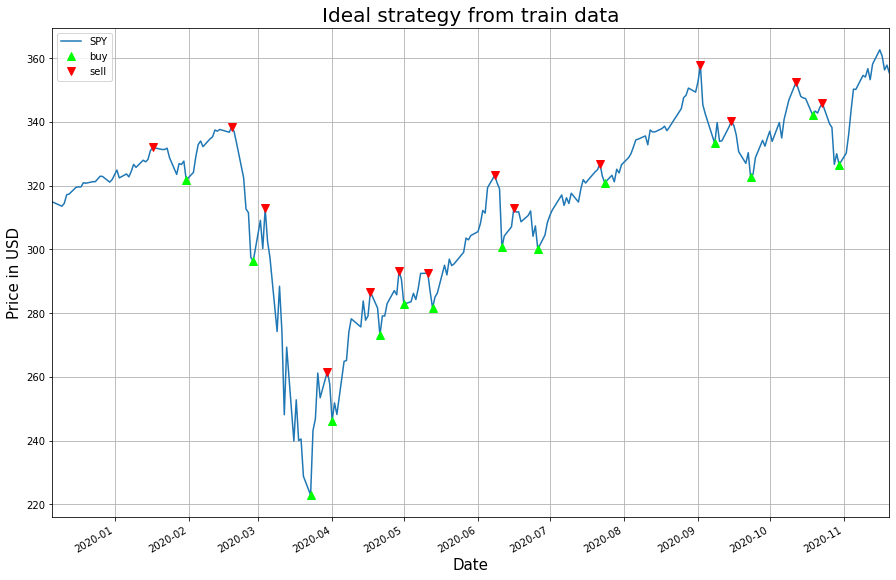

In [18]:
# Ideal buys and sells from the training data for the test period

plt.figure(figsize = (15,10))
# plot close price
df.iloc[-len(y_pred): , 0].plot(label= 'SPY')

# plot buy prices
plt.plot(df[-len(y_pred):][df['signal'] == 1].index, 
         df[-len(y_pred):]['SPY'][df['signal'] == 1], 
         '^', markersize = 8, color = 'lime', label = 'buy')

# plot sell prices
plt.plot(df[-len(y_pred):][df['signal'] == -1].index, 
         df[-len(y_pred):]['SPY'][df['signal'] == -1], 
         'v', markersize = 8, color = 'r', label = 'sell')

plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Ideal strategy from train data', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

invested: 7908.520004272461
account value: 8883.24966430664
gain: 12.32505777955415
shares: 25


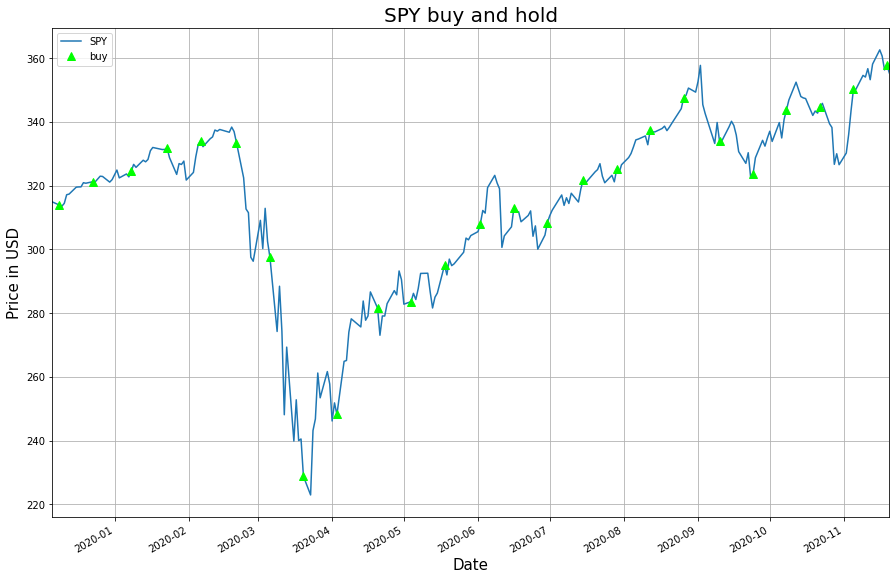

In [19]:
# Benchmark - buy and hold strategy. Buys on every 10th trading day and holds
# Produces return of 12.32% for test period

df['Buy and hold'] = 0

account = 0
shares = 0
for i in range(len(df)-len(y_pred), len(df)):
    if i % 10 == 0:
        account -= df['SPY'][i]
        shares += 1
        df['Buy and hold'][i] = 1
invested = -account
account = shares * df['SPY'][-1]
print('invested:', invested)
print('account value:', account)
print('gain:', ((account / invested) - 1) * 100)
print('shares:', shares)


plt.figure(figsize = (15,10))
# plot close price
df.iloc[-len(y_pred): , 0].plot(label= 'SPY')

# plot buy prices
plt.plot(df[df['Buy and hold'] == 1].index, 
         df['SPY'][df['Buy and hold'] == 1], 
         '^', markersize = 8, color = 'lime', label = 'buy')

plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SPY buy and hold', fontsize = 20)
plt.legend()
plt.grid()
plt.show()